In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\rku68\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
house=pd.read_csv(r"C:\Users\rku68\OneDrive\Desktop\csv\Housing.csv")

In [3]:
house.head(3)

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000


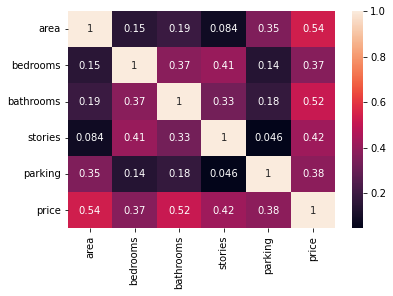

In [4]:
sns.heatmap(data=house.corr(),annot=True)
plt.show()

In [6]:
x=house.iloc[:,:-1]
y=house['price']

In [7]:
ss=StandardScaler()

In [8]:
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)
x.head(3)

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

# LinearRegression

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.score(x_test,y_test)*100

55.687485735226126

In [50]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt((mean_squared_error(y_test,lr.predict(x_test)))))

2042030191687.1387
1061052.0632743195
1428996.218220027


In [25]:
lr.coef_

array([688505.28194196, 114019.63502777, 602812.54753904, 401786.20605425,
       304995.20021462])

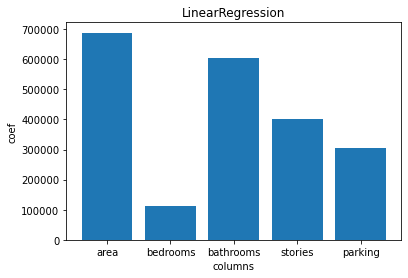

In [28]:
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Lasso

In [14]:
la=Lasso(alpha=100)

In [15]:
la.fit(x_train,y_train)

Lasso(alpha=100)

In [16]:
la.score(x_test,y_test)*100

55.685824650295736

In [17]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt((mean_squared_error(y_test,la.predict(x_test)))))

2042106738586.7014
1061076.0018721207
1429023.0014197468


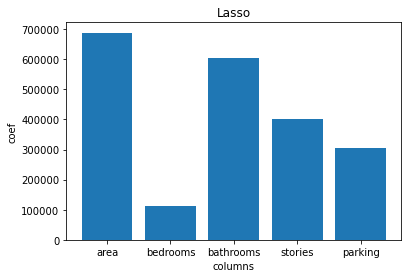

In [18]:
plt.bar(x.columns,la.coef_)
plt.title('Lasso')
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Ridge

In [19]:
ri=Ridge(alpha=1)

In [20]:
ri.fit(x_train,y_train)

Ridge(alpha=1)

In [21]:
ri.score(x_test,y_test)*100

55.671906100495924

In [22]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt((mean_squared_error(y_test,ri.predict(x_test)))))

2042748139766.1938
1061252.4474151286
1429247.4032742525


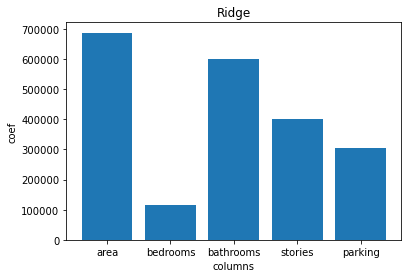

In [23]:
plt.bar(x.columns,ri.coef_)
plt.title('Ridge')
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [24]:
df=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,area,688505.281942,688450.835837,687094.494904
1,bedrooms,114019.635028,113992.465273,114801.351827
2,bathrooms,602812.547539,602757.322938,601429.255185
3,stories,401786.206054,401721.373081,400986.595118
4,parking,304995.200215,304925.540384,304840.806525
